In [ ]:
# Import Libraries
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
a = 16805
c = 0
m = 2147483647
r0 = 123457
sample_size = 100

In [ ]:

def lcg(a, r0, c, m):
  for i in range(sample_size):
    rn = (a * r0 + c) % m
    yield rn/m
    r0 = rn
    

In [ ]:
rn = np.array(list(lcg(a, r0, c, m)))
print(rn)
  

[0.96610509 0.39606047 0.79617841 0.77817559 0.2408524  0.52458716
 0.68721186 0.59525742 0.30089454 0.53274375 0.75869397 0.85218422
 0.95581959 0.54825685 0.45629593 0.05307338 0.89821631 0.52513499
 0.89345614 0.53048778 0.84709999 0.51534057 0.29822634 0.6935791
 0.59683692 0.84447483 0.39951245 0.80676022 0.60549319 0.31299617
 0.90062395 0.98545845 0.62929785 0.35035386 0.69653894 0.33690901
 0.75595607 0.84183323 0.00746203 0.39940321 0.970889   0.78970328
 0.96366123 0.32698836 0.03939873 0.09559201 0.42378863 0.7678903
 0.39642154 0.86399951 0.51175975 0.12261974 0.62471936 0.40880908
 0.03662817 0.53646654 0.32019052 0.80160546 0.97974203 0.56479299
 0.346252   0.76486203 0.50635439 0.28557785 0.13584108 0.80942068
 0.3145834  0.57406738 0.20233791 0.28860186 0.95429765 0.97200242
 0.50059928 0.57089649 0.91547216 0.50957928 0.47981096 0.22325126
 0.73745543 0.9384752  0.0757038  0.20232366 0.04914346 0.85587107
 0.91331754 0.30117622 0.26631203 0.373653   0.23872641 0.797323

Text(0.5, 1.0, 'Random Numbers between [0,1]')

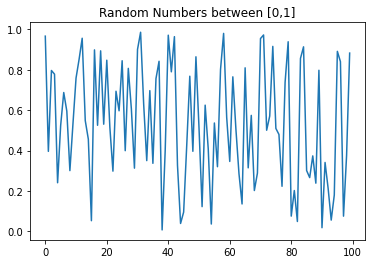

In [ ]:

plt.plot(rn)
plt.title("Random Numbers between [0,1]")

In [ ]:
# Chi-Square Test
def data_to_freq(data, no_of_classes):
  class_size = 1 / no_of_classes 
  count = np.zeros(shape=(no_of_classes))
  
  for i in range(no_of_classes):
    for no in data:
      if (class_size * i <= no < class_size * (i+1)):
        count[i] += 1

  return count 

In [ ]:
def chi_square_test(data, m, no_of_classes):

  obs_freq = data_to_freq(data, no_of_classes)
  # obs_freq = np.array([8, 8, 10, 9, 12, 8, 10, 14, 10, 11])
  exp_freq = np.full(shape= (no_of_classes), fill_value= m / no_of_classes)
  chisquare_value = (((obs_freq - exp_freq)**2) / exp_freq).sum()

  return chisquare_value

In [ ]:
alpha = 0.05
no_of_classes = 10
dof = no_of_classes - 1

In [ ]:

cal_chisquare = chi_square_test(rn, sample_size, no_of_classes)
critical_chisquare = chi2.isf(df= dof, q= alpha)


print(f"Calculated Chi-Square value : {cal_chisquare}")
print(f"Critical Chi-Square value : {critical_chisquare}")
if (cal_chisquare <= critical_chisquare):
  print("Null Hypothesis is not rejected i.e. The generated sequence of Random Number is distributed Uniformly.")
else:
  print("Null Hypothesis is rejected i.e. The generated sequence of Random Number isnot distributed Uniformly.")



Calculated Chi-Square value : 19.4
Critical Chi-Square value : 16.91897760462045
Null Hypothesis is rejected i.e. The generated sequence of Random Number isnot distributed Uniformly.
